creating a cnn model and optimixing it using keras tuner


In [1]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
fashion_mnist=keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
#scalling the images to 0 or 1 since these are in greyscale
train_images=train_images/255.0
test_images-test_images/255.0

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [7]:
train_images[0].shape#checking the the shape of the image

(28, 28)

In [8]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [9]:
def build_model(hp):
  model=keras.Sequential([
      #Conv2D is used to apply convolutional filters to the input data
      keras.layers.Conv2D(
          filters=hp.Int("conv_1_filter",min_value=32,max_value=128,step=16),
          kernel_size=hp.Choice("conv_1_kernel",values=[3,5]),
          activation="relu",
          input_shape=(28,28,1)
      ),
      keras.layers.Conv2D(
          filters=hp.Int("conv_2_filter",min_value=32,max_value=64,step=16),
          kernel_size=hp.Choice("conv_2_kernel",values=[3,5]),
          activation="relu"
      ),
      keras.layers.Flatten(),#it reshapes the multi-dimensional output of convolutional and pooling layers into a one dimensional vector
      keras.layers.Dense(#it is a fully connected layer commonly used in final stages
          units=hp.Int("dense_1_units",min_value=32,max_value=128,step=16),
          activation="relu"
      ),
      keras.layers.Dense(10,activation="softmax")#output layer (10 neurons for 10 classes)
  ])

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate",values=[1e-2,1e-3])),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model


In [10]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-10-2bbfbe7dae29>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [11]:
tuner_search=RandomSearch(build_model,
                          objective="val_accuracy",
                          max_trials=5,
                          directory="output",
                          project_name="mnist cnn"
                          )

In [12]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 42s]
val_accuracy: 0.878166675567627

Best val_accuracy So Far: 0.9073333144187927
Total elapsed time: 00h 03m 19s


In [18]:
trials = tuner_search.oracle.get_best_trials(num_trials=len(tuner_search.oracle.trials))

# Print hyperparameters for each trial
for trial in trials:
    print(f"Trial {trial.trial_id}:")
    for hp, value in trial.hyperparameters.values.items():
        print(f"    {hp}: {value}")
    print(f"    Score: {trial.score}")

Trial 0:
    conv_1_filter: 48
    conv_1_kernel: 5
    conv_2_filter: 64
    conv_2_kernel: 3
    dense_1_units: 64
    learning_rate: 0.001
    Score: 0.9073333144187927
Trial 1:
    conv_1_filter: 32
    conv_1_kernel: 3
    conv_2_filter: 48
    conv_2_kernel: 3
    dense_1_units: 96
    learning_rate: 0.01
    Score: 0.8818333148956299
Trial 4:
    conv_1_filter: 112
    conv_1_kernel: 3
    conv_2_filter: 48
    conv_2_kernel: 3
    dense_1_units: 48
    learning_rate: 0.01
    Score: 0.878166675567627
Trial 3:
    conv_1_filter: 128
    conv_1_kernel: 3
    conv_2_filter: 32
    conv_2_kernel: 3
    dense_1_units: 80
    learning_rate: 0.01
    Score: 0.8603333234786987
Trial 2:
    conv_1_filter: 80
    conv_1_kernel: 5
    conv_2_filter: 32
    conv_2_kernel: 3
    dense_1_units: 32
    learning_rate: 0.01
    Score: 0.859666645526886


In [19]:
best_hps = tuner_search.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best hyperparameters:")
for hp in best_hps.values:
    print(f"{hp}: {best_hps.get(hp)}")

Best hyperparameters:
conv_1_filter: 48
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 3
dense_1_units: 64
learning_rate: 0.001


In [20]:
#choosing the best model with the best hyperparameters after runninf tuner_search
model=tuner_search.get_best_models(num_models=1)[0]

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 48)        1248      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        27712     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 64)                1982528   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 2012138 (7.68 MB)
Trainable params: 2012138 (7.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
#fitting the model
history=model.fit(train_images,train_labels,epochs=10,validation_split=0.1,initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0317 - accuracy: 0.9888 - val_loss: 0.4662 - val_accuracy: 0.9157
Epoch 5/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0276 - accuracy: 0.9902 - val_loss: 0.5141 - val_accuracy: 0.9117
Epoch 6/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0228 - accuracy: 0.9917 - val_loss: 0.5289 - val_accuracy: 0.9095
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0196 - accuracy: 0.9931 - val_loss: 0.5995 - val_accuracy: 0.9117
Epoch 8/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0230 - accuracy: 0.9922 - val_loss: 0.6994 - val_accuracy: 0.9070
Epoch 9/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0185 - accuracy: 0.9937 - val_loss: 0.6823 - val_accuracy: 0.9098
Epoch 10/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0221 - accuracy: 0.9926 - val_loss: 0.6841 - val_accura

In [28]:
y_pred=model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


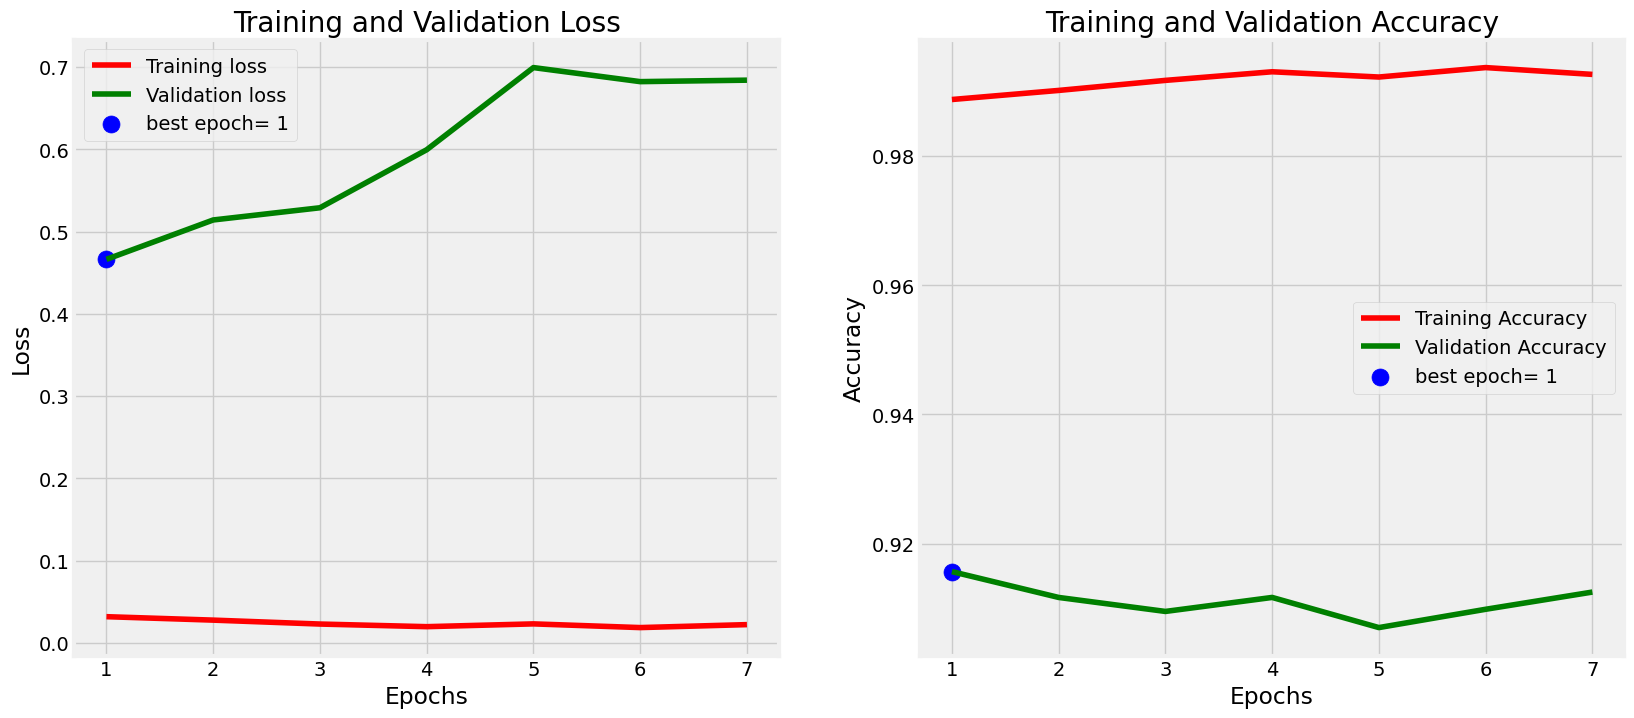

In [30]:
# Define needed
import matplotlib.pyplot as plt
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred=model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
cm=confusion_matrix(test_labels, y_pred_classes)  # Use predicted classes

313/313 [==============================] - 1s 3ms/step


<Axes: >

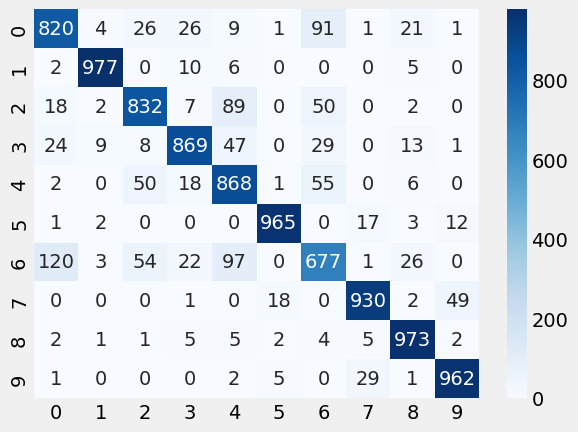

In [33]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap="Blues",fmt="g")